# Exploratory Data Analysis on John Hopkins Time Series Data of COVID-19 cases

**TODO:**
- TBD
- fix the min_val functionality in the "show_country" function (it does not deliver reasonable results the way it is)
- 

**IN PROGRESS:**
- TBD

In [1]:
# LIBRARIES 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import datetime

# Set style & figures inline
sns.set()
%matplotlib inline

# Import Data from URL

In [2]:
# Import data from most recent files from the github repository
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

# Take a look at the first n rows of the dataset (n = 5 by default)
#raw_data_confirmed.head()

# Define the functions

In [3]:
# Function for grouping countries by region
def clean_data(raw_data):
    """Returns data for countries indexed by date"""
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [4]:
# Function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data.loc[(data[col] < min_val),col] = None
    # Drop columns with all NaNs
    data.dropna(axis=1, how='all', inplace=True)
    # Reset index, drop date
    data = data.reset_index().drop(['index'], axis=1)
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data

In [5]:
# Function to plot time series
def plot_time_series(df, plot_title='TBD', x_label='TBD', y_label='TBD', logy=False):
    """Plot time series and make looks a bit nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.title(plot_title, fontsize=20)
    #plt.show()

In [6]:
def show_country(df_confirmed, df_recovered, df_deaths, country="Germany", logy=True, min_val=0):
    """Graphs confirmed, recovered and deaths for a country."""
    country_data = [confirmed_country_drop[country], deaths_country_drop[country], recovered_country_drop[country]]
    df = pd.concat(country_data, axis=1, keys=["confirmed cases", "deaths", "recovered"])
    
    if min_val:
        # Loop over columns & set values < min_val to None
        for col in df.columns:
            df.loc[(df[col] < min_val),col] = None
        # Drop columns with all NaNs
        df.dropna(axis=1, how='all', inplace=True)
        # Reset index, drop date
        df = df.reset_index().drop(['index'], axis=1)
        # Shift each column to begin with first valid index
        for col in df.columns:
            df[col] = df[col].shift(-df[col].first_valid_index())
    
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(xlabel='Days', fontsize=20)
    plt.ylabel(ylabel='Cases', fontsize=20)
    plt.title('COVID19 Data '+country+' ('+str(datetime.date.today())+')', fontsize=20)
    #plt.show()

In [7]:
print(datetime.date.today())

2020-05-25


# Call functions

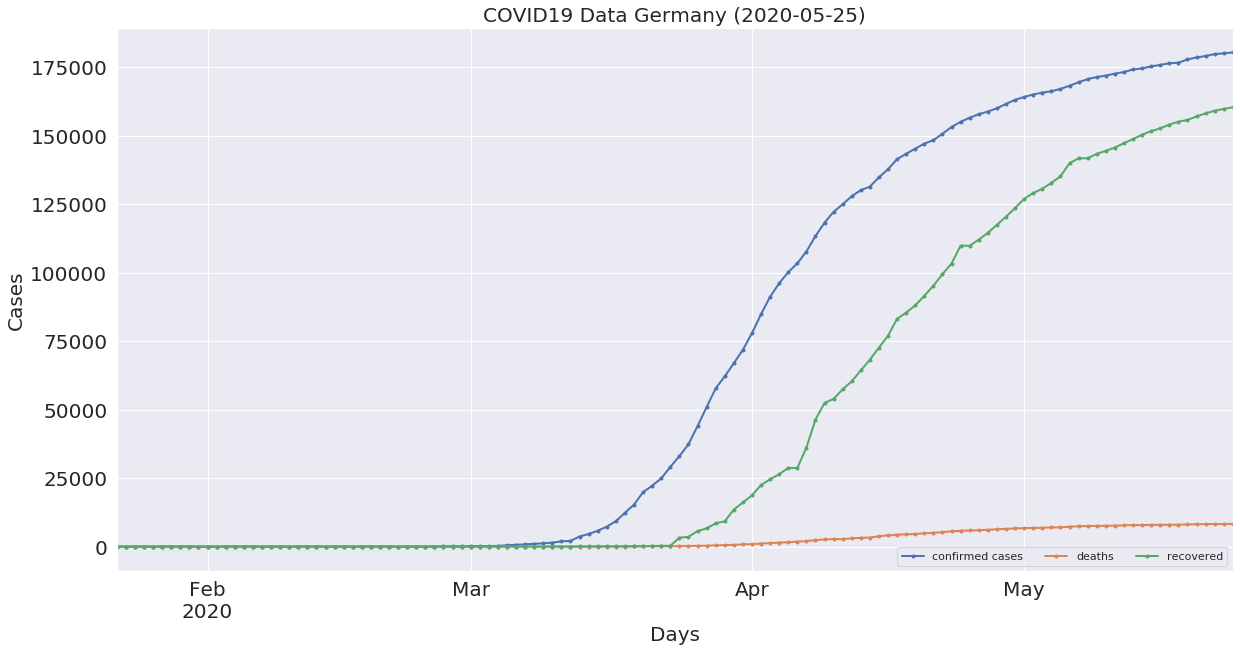

In [9]:
# Compare Confirmed, Deaths and Recovered for one Country

country = 'Germany'

confirmed_country_drop = clean_data(raw_data_confirmed)
deaths_country_drop = clean_data(raw_data_deaths)
recovered_country_drop = clean_data(raw_data_recovered)

show_country(confirmed_country_drop, deaths_country_drop, recovered_country_drop, country, logy=False, min_val=0)

In [15]:
# Countries of interest
poi = ['Germany','Czechia']

# Results Number of Reported Deaths

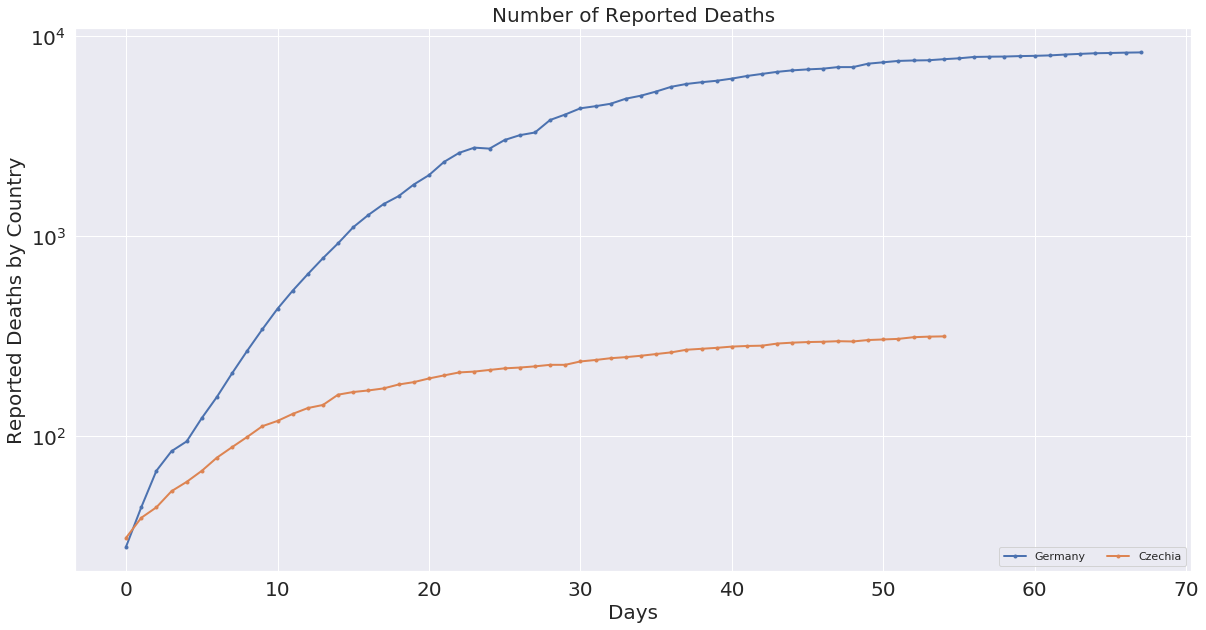

In [16]:
deaths_country_drop = clean_data(raw_data_deaths)
deaths_country_drop = align_curves(deaths_country_drop, min_val=25)

#plot_time_series(deaths_country_drop, 'Number of Reported Deaths', 'Days', 'Reported Deaths by Country', logy=True)

# plot only poi-countries
plot_time_series(deaths_country_drop[poi], 'Number of Reported Deaths', 'Days', 'Reported Deaths by Country', logy=True)

# Results Number of Confirmed Cases

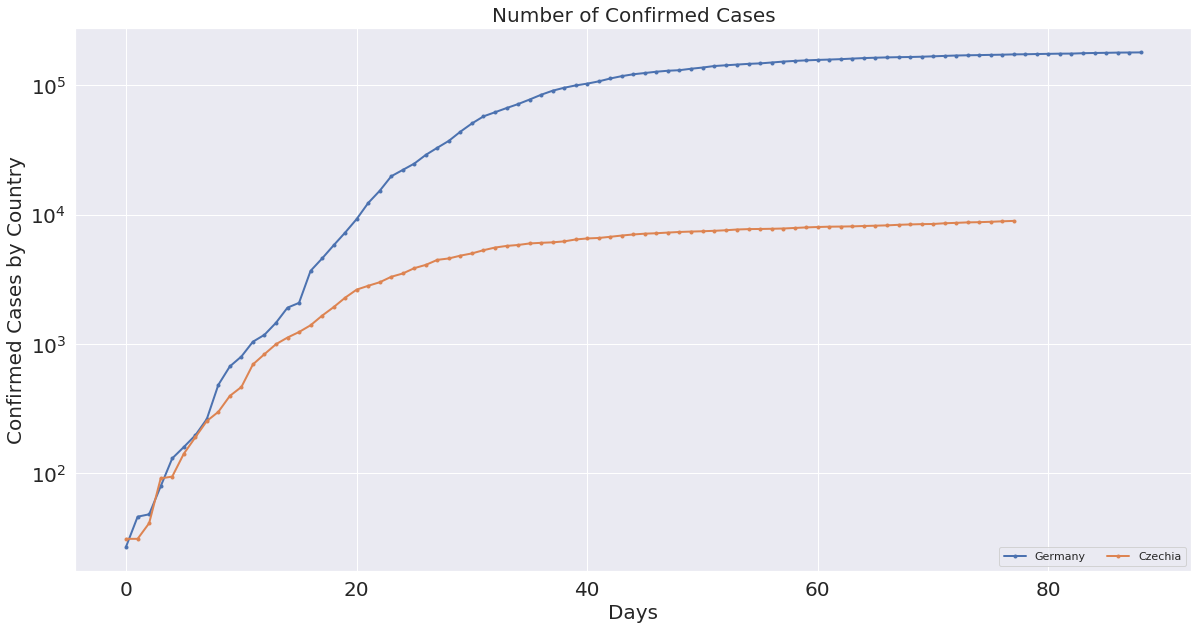

In [17]:
confirmed_country_drop = clean_data(raw_data_confirmed)
confirmed_country_drop = align_curves(confirmed_country_drop, min_val=25)

#plot_time_series(confirmed_country_drop, 'Number of Confirmed Cases', 'Days', 'Confirmed Cases by Country', logy=True)

# plot only poi-countries
plot_time_series(confirmed_country_drop[poi], 'Number of Confirmed Cases', 'Days', 'Confirmed Cases by Country', logy=True)

# Results Number of Recovered Cases

In [ ]:
recovered_country_drop = group_by_country(raw_data_recovered)
recovered_country_drop = align_curves(recovered_country_drop, min_val=25)

#plot_time_series(recovered_country_drop, 'Number of Recovered Cases', 'Days', 'Recovered Cases by Country', logy=True)

# plot only poi-countries
plot_time_series(recovered_country_drop[poi], 'Number of Recovered Cases', 'Days', 'Recovered Cases by Country', logy=True)


# ABLAGE

***Import data from local csv files***

folder = "./datasets"
filename_fix = "time_series_covid19"
filename_var = "_confirmed_global" + ".csv"
filename = filename_fix + filename_var

df = pd.read_csv(filename)#, index_col = 0)